# Digital Image Processing - Problem Set 1

## Student Names:

### Instructions

This first Problem Set covers the topics of basic image manipulation, spatial resolution and intensity level resolution. <br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, **besides the ones provided here**. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

<b>1. </b>Load image from a file and display the image. Determine the size of the image. Finally, save a new copy of the image in a new file.<br /> <br />

<img style="float: left; margin: 0px 0px 15px 15px;" src="cameraman.png" height="200" width="200">

La resolución de la imagen es (768, 1024, 3)


True

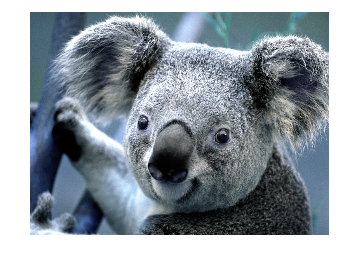

In [5]:
import cv2 #libreria de procesamiento de imagenes
from matplotlib import pyplot as plt #libreria de graficos de imagenes
%matplotlib inline

#Carga la imagen con el formato RGB 
imagen = cv2.imread('imagenes/Koala.jpg',cv2.IMREAD_COLOR)
# Despliega la imagen
plt.imshow(imagen) 
#Quita loa ejes
plt.axis('off'); 
#Imprime la resolución de la imagen
print("La resolución de la imagen es {0}".format(imagen.shape)) 

cv2.imwrite('imagenes/new_koala_image.png',imagen)


<b>2. </b>Write a function <code>flip_image</code>, which flips an image either vertically or horizontally. The function should take two input parameters: the matrix storing the image data and a flag to indicate whether the image should be flipped vertically or horizontally. Use this function to flip an example image both vertically and horizontally.

<b>Note:</b> You are not allowed to use the OpenCV's flip function to solve this problem. You have to implement it by yourself<br /> <br />

<img style="float: left; margin: 0px 0px 15px 15px;" src="Woman.bmp" height="200" width="200">

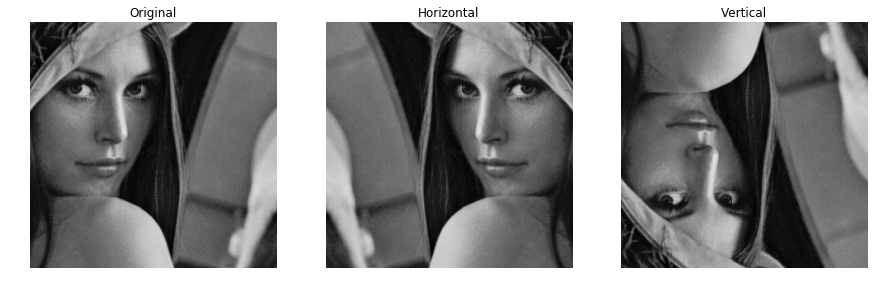

In [11]:
#libreria de procesamiento de imagenes
import cv2
import numpy
#libreria de graficos de imagenes
from matplotlib import pyplot as plt 
%matplotlib inline


#funcion flip_image
def flip_image(image_matrix, flag):
    if(flag == 0): 
        return numpy.fliplr(image_matrix) 
    if(flag == 1): 
        return numpy.flipud(image_matrix) 
    else: 
        print('Error: flag must be 1 or 0.')
        return 0


plt.figure(figsize = (15,15))

woman_image = cv2.imread('imagenes/Woman.bmp',cv2.IMREAD_COLOR)
plt.subplot(1, 3, 1)
plt.imshow(woman_image)
plt.title('Original')
plt.axis('off');

img_flip = flip_image(woman_image,0)
plt.subplot(1, 3, 2)
plt.imshow(img_flip)
plt.title('Horizontal')
plt.axis('off');

img_flip = flip_image(woman_image,1)
plt.subplot(1, 3, 3)
plt.imshow(img_flip)
plt.title('Vertical')
plt.axis('off');


<b>3. </b> Write a function to generate the negative of an image. This means that  a new image is created in which the pixel values are all equal to 1.0 minus the pixel value in the original image. <br /> <br />

<img style="float: left; margin: 0px 0px 15px 15px;" src="moon.jpg" height="200" width=200>

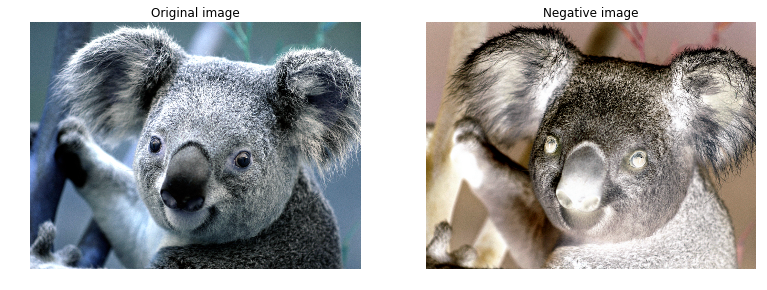

In [2]:
import cv2 #libreria de procesamiento de imagenes
from matplotlib import pyplot as plt #libreria de graficos de imagenes
%matplotlib inline

imagen = cv2.imread('imagenes/Koala.jpg',cv2.IMREAD_COLOR)
imagen_neg = 255 - imagen

plt.figure(figsize=(13, 13))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title('Original image')
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(imagen_neg)
plt.title('Negative image')
plt.axis('off');

<b>4. </b>Write a function <code>average_intensity</code>, which calculates the average intensity level of an image. Use this function on example images and discuss your results. You can use images from section 2 and 3 <br /> <br />

The average intensity from Koala image is 114


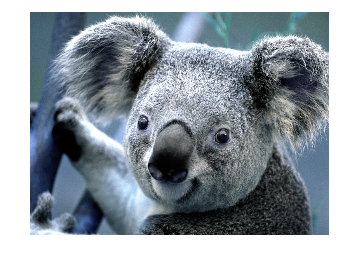

In [8]:
#libreria de procesamiento de imagenes
import cv2 
import numpy
#libreria de graficos de imagenes
from matplotlib import pyplot as plt 
%matplotlib inline



def average_intensity(matrix_image):
    n_elements = numpy.product(matrix_image.shape)
    sum_elements = numpy.sum(matrix_image)
    average = int(numpy.floor(sum_elements)/n_elements))
    return average

koala_image = cv2.imread('imagenes/Koala.jpg',cv2.IMREAD_COLOR)
koala_intensity = average_intensity(koala_image)
plt.imshow(koala_image)
plt.axis('off')
print("The average intensity from Koala image is " + str(koala_intensity))

<b>5. </b>Write a function <code>threshold_image</code> which thresholds an image based on a threshold level given as a parameter to the function. The function should take two parameters: the image to be thresholded and the threshold level. The result of the function should be a new thresholded image. <br /> <br />

<b>Note:</b> You are not allowed to use the OpenCV's threshold function to solve this problem. You have to implement it by yourself<br /> <br />

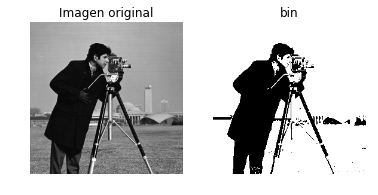

In [10]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt #libreria de graficos de imagenes
%matplotlib inline


def threshold_image(image,threshold):
    new_image = image
    new_image[new_image<=threshold] = 0
    new_image[new_image>threshold] = 255
    return new_image

image = cv2.imread('cameraman.png')
imagebin = threshold_image(imagen,70)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Imagen original')
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(imagebin)
plt.title('bin')
plt.axis('off');

<b>6. </b>Write a function <code>avg_intensity_threshold_image</code> which takes an image as its only parameter and thresholds this image based on the images average intensity value. <b>Hint:</b> Simply write a new function that uses the two functions just written. <br /> <br />

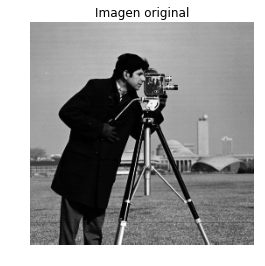

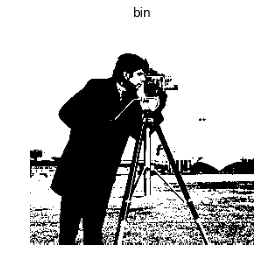

In [12]:
import numpy
import cv2 as cv
from matplotlib import pyplot as plt #libreria de graficos de imagenes

def threshold_image(image,threshold):
    new_image = image.copy()
    new_image[new_image <= threshold] = 0
    new_image[new_image > threshold] = 255
    return new_image

def average_intensity(matrix_image):
    n_elements = numpy.product(matrix_image.shape)
    sum_elements = numpy.sum(matrix_image)
    average = int(numpy.floor(sum_elements)/n_elements)
    return average

def avg_intensity_threshold_image(matrix_image):
    average = average_intensity(matrix_image)
    new_image = threshold_image(matrix_image,average)
    return new_image


original_image = cv2.imread('cameraman.png',0)

image_bin = avg_intensity_threshold_image(original_image)

plt.figure()
plt.imshow(original_image,cmap='gray')
plt.title('Imagen original')
plt.axis('off');

plt.figure()
plt.imshow(image_bin,cmap='gray')
plt.title('bin')
plt.axis('off');



<b>7. </b>Write a function which subsamples a grayscale image of size 512x512 by factors of 2, i.e., 256, 128, 64 and display your results. There are multiple ways to do this as discussed in the textbook. You may simply sub-sample, average, etc.  Describe which you used and why.

<img style="float: left; margin: 0px 0px 15px 15px;" src="rose.bmp" height="256" width="256">
<img style="float: left; margin: 0px 0px 15px 15px;" src="rose.bmp" height="128" width="128">
<img style="float: left; margin: 0px 0px 15px 15px;" src="rose.bmp" height="64" width="64">
<img style="float: left; margin: 0px 0px 15px 15px;" src="rose.bmp" height="32" width="32">


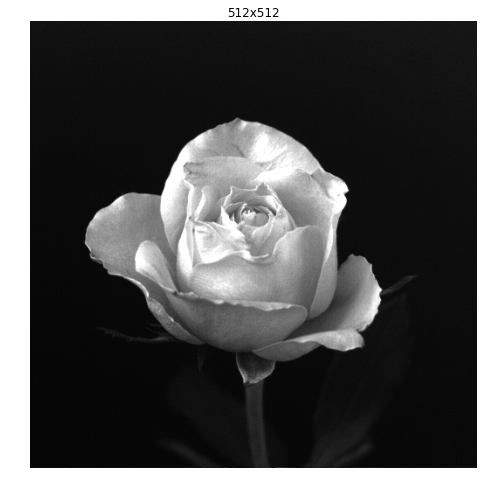

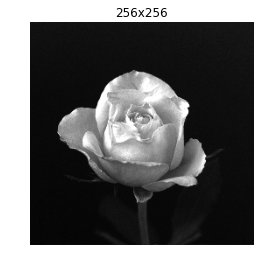

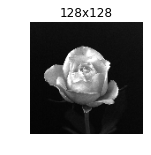

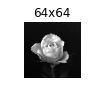

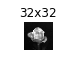

In [17]:
#libreria de procesamiento de imagenes
import cv2
import numpy
#libreria de graficos de imagenes
from matplotlib import pyplot as plt 

rose_image = cv2.imread('imagenes/rose.bmp',cv2.IMREAD_COLOR)
h = rose_image.shape[0]
w = rose_image.shape[1]
scales = [0.5, 0.25, 0.125, 0.0625, 0.03125]

n = len(scales); 

for i in range(n): 
    new_image = cv2.resize(rose_image, None, fx=scales[i], fy=scales[i], interpolation = cv2.INTER_CUBIC)
    height = new_image.shape[0]
    width = new_image.shape[1]
    
    plt.figure(figsize = (16 * scales[i], 16 * scales[i]))
    plt.imshow(new_image)
    plt.title(str(height) + "x" + str(width))
    plt.axis('off');


<b>8. </b>Keeping your original image resolution reduce the number of gray levels in your image from 256 to 2 in powers of 2. Display your results.

<img style="float: left; margin: 0px 0px 15px 15px;" src="skull.bmp" height="200" width=200>

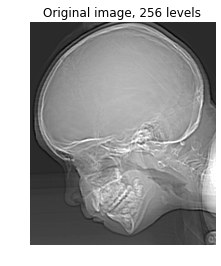

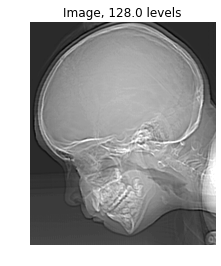

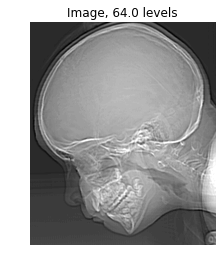

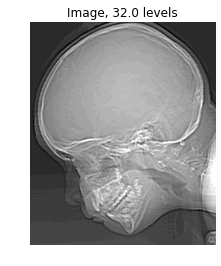

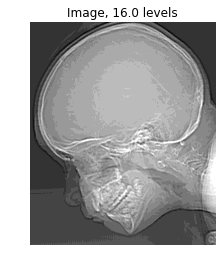

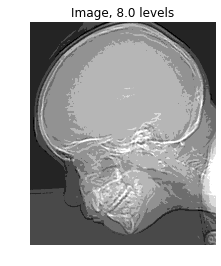

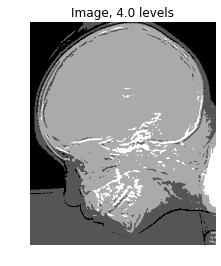

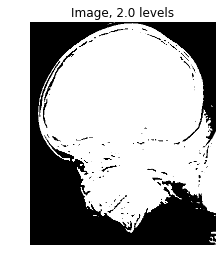

In [28]:
import cv2 
import numpy 
from matplotlib import pyplot as plt 

def reduce_greys_levels(matrix_image, flag): 
    new_image = (2**flag) * numpy.floor((matrix_image)/(2**flag ))
    return new_image

#skull_image = cv2.imread('imagenes/cameraman.png',cv2.IMREAD_GRAYSCALE)
skull_image = cv2.imread('imagenes/skull.bmp',cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(skull_image, cmap='gray')
plt.title('Original image, 256 levels')
plt.axis('off')

reduce_level = [1, 2, 3, 4, 5, 6, 7] 
n = len(reduce_level) 

for item in reduce_level: 
    modifed_image = reduce_greys_levels(skull_image, item);
    plt.figure()
    plt.imshow(modifed_image,cmap='gray')
    plt.title('Image, ' + str(256/(2**item)) + ' levels')
    plt.axis('off')